[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Qiuyi-Hong/Pre-Interview-Task-Newcastle/blob/main/analysisScenario1.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from datetime import datetime, timedelta
%matplotlib inline
import pyomo.environ as pyo
from scenario1 import model 

In [2]:
data = pd.read_excel('data.xlsx')
data.head()

,Unnamed: 0,Demand (kW),Unnamed: 2,Unnamed: 3,Solar Generation (kW),Unnamed: 5,Unnamed: 6,Electricity Price (p/kWh),Unnamed: 8
0,NaN,H1,H2,H3,H1,H2,H3,Import,Export
1,00:00:00,0.452,0.5,0.188,0,0,0,10.3425,3.86
2,00:30,0.32,0.352,0.092,0,0,0,10.5735,3.82
3,01:00,0.372,0.36,0.184,0,0,0,10.668,3.82
4,01:30,0.208,0.232,0.084,0,0,0,10.185,3.82


In [3]:
T = 48
delta_t = 0.5
demand_h1 = data.iloc[1:, 1] # demand for house 1
demand_h2 = data.iloc[1:, 2] # demand for house 2
demand_h3 = data.iloc[1:, 3] # demand for house 3 

pv_h1 = data.iloc[1:, 4] # pv for house 1
pv_h2 = data.iloc[1:, 5] # pv for house 2
pv_h3 = data.iloc[1:, 6] # pv for house 3

ele_import_price = data.iloc[1:, 7] # electricity import price
ele_export_price = data.iloc[1:, 8] # electricity export price

# House 1

In [4]:
house1 = model.create_instance("house1.dat", namespace="base")

In [5]:
for t in range(1,T+1):
    house1.d._data[t].value = demand_h1[t]
    house1.q_pv._data[t].value = pv_h1[t]
    house1.pi_import._data[t].value = ele_import_price[t]
    house1.pi_export._data[t].value = ele_export_price[t]

In [6]:
solver = pyo.SolverFactory('glpk')
solver.solve(house1)

{'Problem': [{'Name': 'unknown', 'Lower bound': 104.66570195679, 'Upper bound': 104.66570195679, 'Number of objectives': 1, 'Number of constraints': 433, 'Number of variables': 336, 'Number of nonzeros': 864, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '33', 'Number of created subproblems': '33'}}, 'Error rc': 0, 'Time': 0.012923717498779297}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

## Visualisation -- House 1

In [7]:
for t in range(1,T+1):
    print(f"t={t}, p_c={house1.p_c._data[t].value}, p_d={house1.p_d._data[t].value}, q_import={house1.q_import._data[t].value}, q_export={house1.q_export._data[t].value}, E={house1.E._data[t].value}, d={house1.d._data[t].value}, q_pv={house1.q_pv._data[t].value}")

t=1, p_c=-0.0, p_d=-0.0, q_import=0.226, q_export=0.0, E=1.999, d=0.452, q_pv=0
t=2, p_c=-0.0, p_d=-0.0, q_import=0.16, q_export=0.0, E=1.998, d=0.32, q_pv=0
t=3, p_c=-0.0, p_d=-0.0, q_import=0.186, q_export=0.0, E=1.997, d=0.372, q_pv=0
t=4, p_c=-0.0, p_d=-0.0, q_import=0.104, q_export=0.0, E=1.996, d=0.208, q_pv=0
t=5, p_c=-0.0, p_d=-0.0, q_import=0.15, q_export=0.0, E=1.995, d=0.3, q_pv=0
t=6, p_c=-0.0, p_d=-0.0, q_import=0.188, q_export=0.0, E=1.994, d=0.376, q_pv=0
t=7, p_c=-0.0, p_d=-0.0, q_import=0.104, q_export=0.0, E=1.993, d=0.208, q_pv=0
t=8, p_c=-0.0, p_d=-0.0, q_import=0.138, q_export=0.0, E=1.992, d=0.276, q_pv=0
t=9, p_c=-0.0, p_d=-0.0, q_import=0.154, q_export=0.0, E=1.991, d=0.308, q_pv=0
t=10, p_c=-0.0, p_d=-0.0, q_import=0.068, q_export=0.0, E=1.99, d=0.136, q_pv=0
t=11, p_c=1.52249382716049, p_d=-0.0, q_import=0.859246913580244, q_export=0.0, E=2.67412222222222, d=0.196, q_pv=0
t=12, p_c=-0.0, p_d=-0.0, q_import=0.157, q_export=0.0, E=2.67312222222222, d=0.324, q_pv

In [8]:
p_c_h1 = [house1.p_c._data[t].value for t in range(1,T+1)]
p_d_h1 = [house1.p_d._data[t].value for t in range(1,T+1)]
E_h1 = [house1.E._data[t].value for t in range(1,T+1)]
q_import_h1 = [house1.q_import._data[t].value for t in range(1,T+1)]
q_export_h1 = [house1.q_export._data[t].value for t in range(1,T+1)]

d_h1 = [house1.d._data[t].value for t in range(1,T+1)]
q_pv_h1 = [house1.q_pv._data[t].value for t in range(1,T+1)]

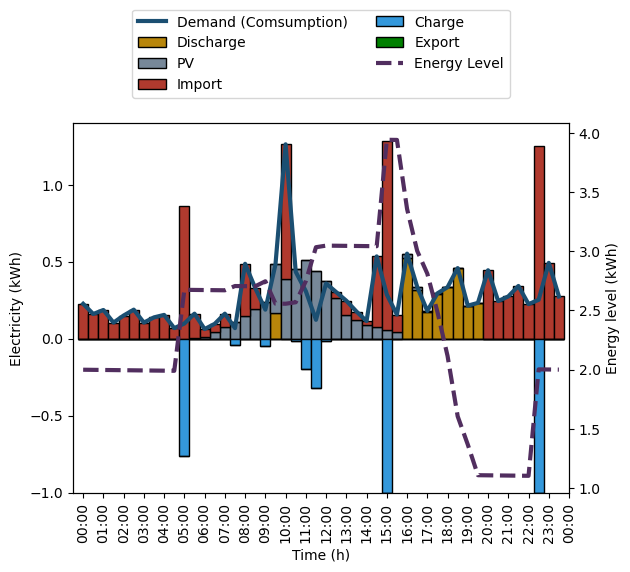

In [39]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(d_h1)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

ax1.bar(time_range, np.array(p_d_h1)*delta_t, width=bar_width, label="Discharge", color="#B8860B", edgecolor="black")

ax1.bar(time_range, np.array(q_pv_h1)*delta_t, bottom=np.array(p_d_h1)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

ax1.bar(time_range, np.array(q_import_h1), bottom=np.array(q_pv_h1)*delta_t + np.array(p_d_h1)*delta_t, width=bar_width, align='center', label="Import", color="#B03A2E", edgecolor="black")

ax1.bar(time_range, np.negative(p_c_h1)*delta_t, width=bar_width, label="Charge", color="#3498DB", edgecolor="black")

ax1.bar(time_range, np.negative(q_export_h1), bottom=np.negative(p_c_h1)*delta_t, width=bar_width, label="Export", color="#008000", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)")

# Second y-axis
ax2 = ax1.twinx() 
ax2.plot(time_range, np.array(E_h1), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
ax2.set_ylabel("Energy level (kWh)")
# ax2.legend()

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
ax1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("house1.pdf", bbox_inches='tight')
plt.show()

# House 2

In [40]:
house2 = model.create_instance("house2.dat", namespace="base")

In [41]:
for t in range(1,T+1):
    house2.d._data[t].value = demand_h2[t]
    house2.q_pv._data[t].value = pv_h2[t]
    house2.pi_import._data[t].value = ele_import_price[t]
    house2.pi_export._data[t].value = ele_export_price[t]

In [42]:
solver = pyo.SolverFactory('glpk')
solver.solve(house2)

{'Problem': [{'Name': 'unknown', 'Lower bound': 168.887209037037, 'Upper bound': 168.887209037037, 'Number of objectives': 1, 'Number of constraints': 433, 'Number of variables': 336, 'Number of nonzeros': 864, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '23', 'Number of created subproblems': '23'}}, 'Error rc': 0, 'Time': 0.03690791130065918}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

## Visualisation -- House 2

In [43]:
for t in range(1,T+1):
    print(f"t={t}, p_c={house2.p_c._data[t].value}, p_d={house2.p_d._data[t].value}, q_import={house2.q_import._data[t].value}, q_export={house2.q_export._data[t].value}, E={house2.E._data[t].value}, d={house2.d._data[t].value}, q_pv={house2.q_pv._data[t].value}")

t=1, p_c=-0.0, p_d=-0.0, q_import=0.25, q_export=0.0, E=2.999, d=0.5, q_pv=0
t=2, p_c=-0.0, p_d=-0.0, q_import=0.176, q_export=0.0, E=2.998, d=0.352, q_pv=0
t=3, p_c=-0.0, p_d=-0.0, q_import=0.18, q_export=0.0, E=2.997, d=0.36, q_pv=0
t=4, p_c=-0.0, p_d=-0.0, q_import=0.116, q_export=0.0, E=2.996, d=0.232, q_pv=0
t=5, p_c=-0.0, p_d=-0.0, q_import=0.196, q_export=0.0, E=2.995, d=0.392, q_pv=0
t=6, p_c=-0.0, p_d=-0.0, q_import=0.274, q_export=0.0, E=2.994, d=0.548, q_pv=0
t=7, p_c=-0.0, p_d=-0.0, q_import=0.094, q_export=0.0, E=2.993, d=0.188, q_pv=0
t=8, p_c=-0.0, p_d=-0.0, q_import=0.176, q_export=0.0, E=2.992, d=0.352, q_pv=0
t=9, p_c=-0.0, p_d=-0.0, q_import=0.11, q_export=0.0, E=2.991, d=0.22, q_pv=0
t=10, p_c=-0.0, p_d=-0.0, q_import=0.508, q_export=0.0, E=2.99, d=1.016, q_pv=0
t=11, p_c=2.38814814814815, p_d=-0.0, q_import=1.64407407407407, q_export=0.0, E=4.06366666666667, d=0.9, q_pv=0
t=12, p_c=-0.0, p_d=-0.0, q_import=0.124, q_export=0.0, E=4.06266666666667, d=0.248, q_pv=0
t=

In [44]:
p_c_h2 = [house2.p_c._data[t].value for t in range(1,T+1)]
p_d_h2 = [house2.p_d._data[t].value for t in range(1,T+1)]
E_h2 = [house2.E._data[t].value for t in range(1,T+1)]
q_import_h2 = [house2.q_import._data[t].value for t in range(1,T+1)]
q_export_h2 = [house2.q_export._data[t].value for t in range(1,T+1)]

d_h2 = [house2.d._data[t].value for t in range(1,T+1)]
q_pv_h2 = [house2.q_pv._data[t].value for t in range(1,T+1)]

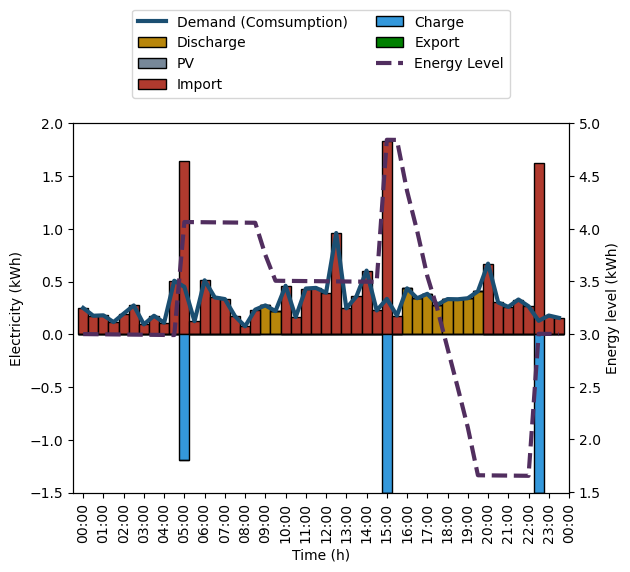

In [45]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(d_h2)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

ax1.bar(time_range, np.array(p_d_h2)*delta_t, width=bar_width, label="Discharge", color="#B8860B", edgecolor="black")

ax1.bar(time_range, np.array(q_pv_h2)*delta_t, bottom=np.array(p_d_h2)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

ax1.bar(time_range, np.array(q_import_h2), bottom=np.array(q_pv_h2)*delta_t + np.array(p_d_h2)*delta_t, width=bar_width, align='center', label="Import", color="#B03A2E", edgecolor="black")

ax1.bar(time_range, np.negative(p_c_h2)*delta_t, width=bar_width, label="Charge", color="#3498DB", edgecolor="black")

ax1.bar(time_range, np.negative(q_export_h2), bottom=np.negative(p_c_h2)*delta_t, width=bar_width, label="Export", color="#008000", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)")

# Second y-axis
ax2 = ax1.twinx() 
ax2.plot(time_range, np.array(E_h2), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
ax2.set_ylabel("Energy level (kWh)")
# ax2.legend()

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
ax1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("house2.pdf", bbox_inches='tight')
plt.show()

# House 3

In [46]:
house3 = model.create_instance("house3.dat", namespace="base")

In [47]:
for t in range(1,T+1):
    house3.d._data[t].value = demand_h3[t]
    house3.q_pv._data[t].value = pv_h3[t]
    house3.pi_import._data[t].value = ele_import_price[t]
    house3.pi_export._data[t].value = ele_export_price[t]

In [48]:
solver = pyo.SolverFactory('glpk')
solver.solve(house3)

{'Problem': [{'Name': 'unknown', 'Lower bound': 0.60962713333337, 'Upper bound': 0.60962713333337, 'Number of objectives': 1, 'Number of constraints': 433, 'Number of variables': 336, 'Number of nonzeros': 864, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '67', 'Number of created subproblems': '67'}}, 'Error rc': 0, 'Time': 0.018841266632080078}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

## Visualisation -- House 3

In [49]:
for t in range(1,T+1):
    print(f"t={t}, p_c={house3.p_c._data[t].value}, p_d={house3.p_d._data[t].value}, q_import={house3.q_import._data[t].value}, q_export={house3.q_export._data[t].value}, E={house3.E._data[t].value}, d={house3.d._data[t].value}, q_pv={house3.q_pv._data[t].value}")

t=1, p_c=-0.0, p_d=0.188, q_import=-0.0, q_export=0.0, E=3.89455555555556, d=0.188, q_pv=0
t=2, p_c=-0.0, p_d=0.092, q_import=-0.0, q_export=0.0, E=3.84244444444444, d=0.092, q_pv=0
t=3, p_c=-0.0, p_d=0.184, q_import=-0.0, q_export=0.0, E=3.73922222222222, d=0.184, q_pv=0
t=4, p_c=-0.0, p_d=0.084, q_import=-0.0, q_export=0.0, E=3.69155555555556, d=0.084, q_pv=0
t=5, p_c=-0.0, p_d=-0.0, q_import=0.094, q_export=0.0, E=3.69055555555556, d=0.188, q_pv=0
t=6, p_c=-0.0, p_d=0.092, q_import=-0.0, q_export=0.0, E=3.63844444444445, d=0.092, q_pv=0
t=7, p_c=-0.0, p_d=0.184, q_import=-0.0, q_export=0.0, E=3.53522222222222, d=0.184, q_pv=0
t=8, p_c=-0.0, p_d=-0.0, q_import=0.042, q_export=0.0, E=3.53422222222222, d=0.084, q_pv=0
t=9, p_c=-0.0, p_d=-0.0, q_import=0.1, q_export=0.0, E=3.53322222222222, d=0.2, q_pv=0
t=10, p_c=-0.0, p_d=-0.0, q_import=0.042, q_export=0.0, E=3.53222222222222, d=0.084, q_pv=0
t=11, p_c=-0.0, p_d=-0.0, q_import=0.094, q_export=0.0, E=3.53122222222222, d=0.188, q_pv=0
t

In [50]:
p_c_h3 = [house3.p_c._data[t].value for t in range(1,T+1)]
p_d_h3 = [house3.p_d._data[t].value for t in range(1,T+1)]
E_h3 = [house3.E._data[t].value for t in range(1,T+1)]
q_import_h3 = [house3.q_import._data[t].value for t in range(1,T+1)]
q_export_h3 = [house3.q_export._data[t].value for t in range(1,T+1)]

d_h3 = [house3.d._data[t].value for t in range(1,T+1)]
q_pv_h3 = [house3.q_pv._data[t].value for t in range(1,T+1)]

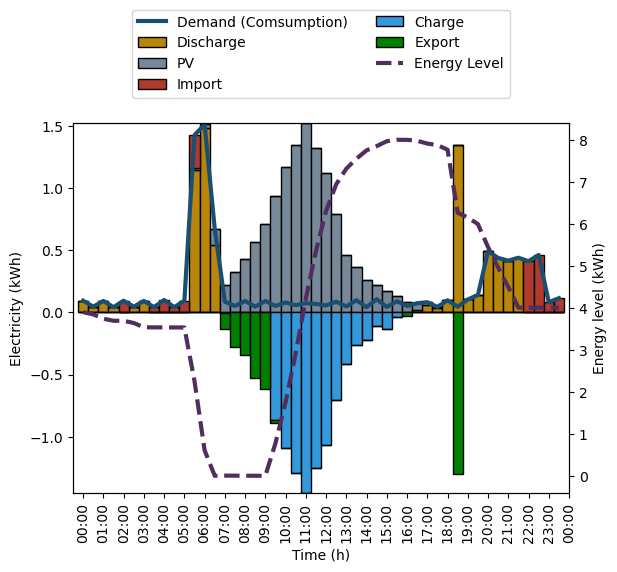

In [54]:
fig, ax1 = plt.subplots()
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

ax1.plot(time_range, np.array(d_h3)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

ax1.bar(time_range, np.array(p_d_h3)*delta_t, width=bar_width, label="Discharge", color="#B8860B", edgecolor="black")

ax1.bar(time_range, np.array(q_pv_h3)*delta_t, bottom=np.array(p_d_h3)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

ax1.bar(time_range, np.array(q_import_h3), bottom=np.array(q_pv_h3)*delta_t + np.array(p_d_h3)*delta_t, width=bar_width, align='center', label="Import", color="#B03A2E", edgecolor="black")

ax1.bar(time_range, np.negative(p_c_h3)*delta_t, width=bar_width, label="Charge", color="#3498DB", edgecolor="black")

ax1.bar(time_range, np.negative(q_export_h3), bottom=np.negative(p_c_h3)*delta_t, width=bar_width, label="Export", color="#008000", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
ax1.set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

plt.xticks(rotation=90)  # Rotate labels to avoid overlap

ax1.set_xlabel("Time (h)")
ax1.set_ylabel("Electricity (kWh)")

# Second y-axis
ax2 = ax1.twinx() 
ax2.plot(time_range, np.array(E_h3), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
ax2.set_ylabel("Energy level (kWh)")
# ax2.legend()

# Collect handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
ax1.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig("house3.pdf", bbox_inches='tight')
plt.show()

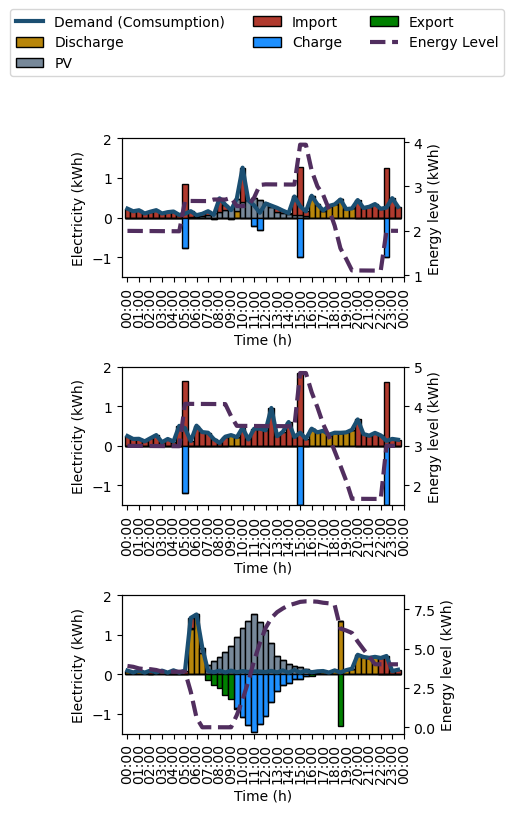

In [38]:
# Combine three figures together:
# fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns, sharing y axis
fig, axs = plt.subplots(3, 1, figsize=(4, 7), sharey=True)  # 1 row, 3 columns, sharing y axis

####################### Plotting for house 1 #######################
lineStyle = ["-", "-.", "--", ":"]    
patterns = [ "/" , "\\", "*" , "+" , "-", "o", "O", "x", "*", "|"]

# Generate a range of datetime objects from 00:00 to 23:30 with half-hourly intervals
start_time = datetime(2023, 1, 1)  # Arbitrary date, time is what matters here
end_time = start_time + timedelta(hours=24)
time_range = [start_time + timedelta(minutes=30)*i for i in range(48)]
bar_width = (time_range[1] - time_range[0]).total_seconds() / (24*60*60)  # Convert to fraction of a day

axs[0].plot(time_range, np.array(d_h1)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

axs[0].bar(time_range, np.array(p_d_h1)*delta_t, width=bar_width, label="Discharge", color="#B8860B", edgecolor="black")

axs[0].bar(time_range, np.array(q_pv_h1)*delta_t, bottom=np.array(p_d_h1)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

axs[0].bar(time_range, np.array(q_import_h1), bottom=np.array(q_pv_h1)*delta_t + np.array(p_d_h1)*delta_t, width=bar_width, align='center', label="Import", color="#B03A2E", edgecolor="black")

axs[0].bar(time_range, np.negative(p_c_h1)*delta_t, width=bar_width, label="Charge", color="#3498DB", edgecolor="black")

axs[0].bar(time_range, np.negative(q_export_h1), bottom=np.negative(p_c_h1)*delta_t, width=bar_width, label="Export", color="#008000", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
axs[0].set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
axs[0].xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

# plt.xticks(rotation=90)  # Rotate labels to avoid overlap
axs[0].tick_params(axis='x', rotation=90)

axs[0].set_xlabel("Time (h)")
axs[0].set_ylabel("Electricity (kWh)")

# Second y-axis
axs1 = axs[0].twinx() 
axs1.plot(time_range, np.array(E_h1), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
axs1.set_ylabel("Energy level (kWh)")

####################### Plotting for house 2 #######################
axs[1].plot(time_range, np.array(d_h2)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

axs[1].bar(time_range, np.array(p_d_h2)*delta_t, width=bar_width, label="Discharge", color="#B8860B", edgecolor="black")

axs[1].bar(time_range, np.array(q_pv_h2)*delta_t, bottom=np.array(p_d_h2)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

axs[1].bar(time_range, np.array(q_import_h2), bottom=np.array(q_pv_h2)*delta_t + np.array(p_d_h2)*delta_t, width=bar_width, align='center', label="Import", color="#B03A2E", edgecolor="black")

axs[1].bar(time_range, np.negative(p_c_h2)*delta_t, width=bar_width, label="Charge", color="#3498DB", edgecolor="black")

axs[1].bar(time_range, np.negative(q_export_h2), bottom=np.negative(p_c_h2)*delta_t, width=bar_width, label="Export", color="#008000", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
axs[1].set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
axs[1].xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

# plt.xticks(rotation=90)  # Rotate labels to avoid overlap
axs[1].tick_params(axis='x', rotation=90)

axs[1].set_xlabel("Time (h)")
axs[1].set_ylabel("Electricity (kWh)")

# Second y-axis
axs2 = axs[1].twinx() 
axs2.plot(time_range, np.array(E_h2), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
axs2.set_ylabel("Energy level (kWh)")

####################### Plotting for house 3 #######################
axs[2].plot(time_range, np.array(d_h3)*delta_t, label="Demand (Comsumption)", color="#1B4F72", linestyle=lineStyle[0], linewidth=3)

axs[2].bar(time_range, np.array(p_d_h3)*delta_t, width=bar_width, label="Discharge", color="#B8860B", edgecolor="black")

axs[2].bar(time_range, np.array(q_pv_h3)*delta_t, bottom=np.array(p_d_h3)*delta_t, width=bar_width, label="PV", color="#778899", edgecolor="black")

axs[2].bar(time_range, np.array(q_import_h3), bottom=np.array(q_pv_h3)*delta_t + np.array(p_d_h3)*delta_t, width=bar_width, align='center', label="Import", color="#B03A2E", edgecolor="black")

axs[2].bar(time_range, np.negative(p_c_h3)*delta_t, width=bar_width, label="Charge", color="#3498DB", edgecolor="black")

axs[2].bar(time_range, np.negative(q_export_h3), bottom=np.negative(p_c_h3)*delta_t, width=bar_width, label="Export", color="#008000", edgecolor="black")

# Formatting the x-axis to display time in HH:MM format
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Setting x-axis limits
axs[2].set_xlim(start_time - timedelta(minutes=30), end_time)

# Setting x-axis ticks to be every half hour
axs[2].xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60], interval=1))

# plt.xticks(rotation=90)  # Rotate labels to avoid overlap
axs[2].tick_params(axis='x', rotation=90)

axs[2].set_xlabel("Time (h)")
axs[2].set_ylabel("Electricity (kWh)")

# Second y-axis
axs3 = axs[2].twinx() 
axs3.plot(time_range, np.array(E_h3), label="Energy Level", color="#512E5F", linestyle=lineStyle[2], linewidth=3)  
axs3.set_ylabel("Energy level (kWh)")

# Collect handles and labels for both axes
handles1, labels1 = axs[0].get_legend_handles_labels()
handles2, labels2 = axs1.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles1 + handles2
all_labels = labels1 + labels2

# Create a single legend
fig.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.tight_layout()
plt.savefig("combined_houses.pdf", bbox_inches='tight')
plt.show()